# Netflix Movies and TV Shows - Exploratory Data Analysis (EDA)

This project explores the Netflix Movies and TV Shows dataset to uncover trends in content production, genres, countries, and release patterns using Python.


## Importing Required Libraries
Pandas, NumPy, and Matplotlib are used for data manipulation and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Loading the Dataset
The dataset is loaded using Pandas and previewed to understand the structure and features.


In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Dataset Overview

This section helps in understanding the structure of the dataset, including number of rows, columns, data types, and basic statistics before performing deeper analysis.


In [5]:
df.shape
df.columns
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## Missing Values Analysis

This step checks for missing values across all columns to assess data quality before further analysis.

**Observations:**
- The `director` column contains a large number of missing values (2634), which is common for TV shows and some older titles.  
- The `cast` and `country` columns also contain missing entries.  
- Only a few missing values exist in `date_added`, `rating`, and `duration`.  
- Columns such as `title`, `type`, `release_year`, `listed_in`, and `description` have no missing values and are reliable for analysis.

**Conclusion:**
Since this project focuses on trends, genres, content type, and release patterns, the dataset is still suitable for meaningful analysis without heavy cleaning.



In [6]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Movies vs TV Shows Distribution

This analysis compares the number of Movies and TV Shows available on Netflix to understand the overall content distribution on the platform.


In [8]:
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

### Interpretation

- Netflix contains significantly more **Movies** than **TV Shows** in this dataset.  
- This indicates that the platform has historically focused more on movies compared to series content.  
- Understanding content distribution helps in analyzing platform strategy and audience targeting.


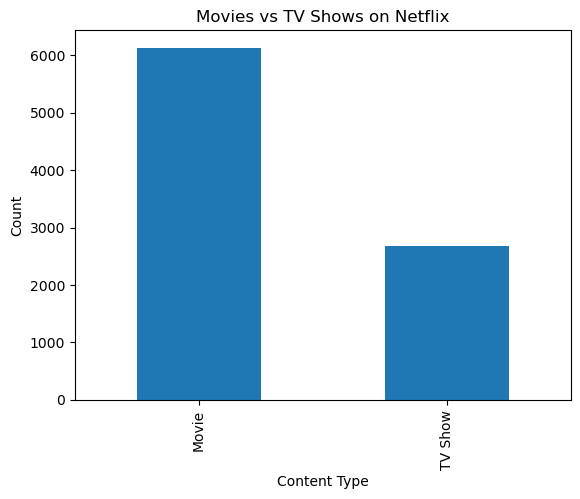

In [9]:
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


## Interpretation of Movies vs TV Shows Distribution

The bar chart shows a clear imbalance between the number of Movies and TV Shows available on Netflix.

**Key Insights:**
- Movies significantly outnumber TV Shows in the dataset.  
- This suggests that Netflix’s catalog (in this dataset) has a stronger focus on movies compared to series.  
- The platform appears to prioritize movie content for wider audience reach.

**Business Perspective:**
Understanding content distribution helps platforms like Netflix decide where to invest more — for example, whether to increase original TV show production to balance engagement and retention.


## Year-wise Content Growth

This analysis explores how the number of titles added to Netflix has changed over the years, helping to understand platform growth and content expansion trends.


In [12]:
df['year_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce').dt.year


In [13]:
df['year_added'].value_counts().sort_index()


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64

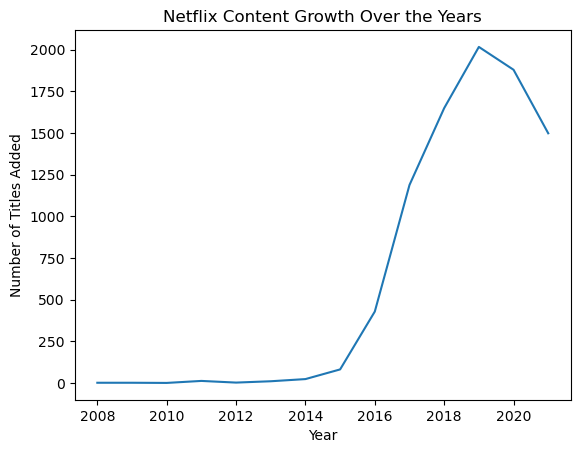

In [15]:
df['year_added'].value_counts().sort_index().plot()
plt.title("Netflix Content Growth Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()


## Interpretation of Year-wise Content Growth

The line chart illustrates how the number of titles added to Netflix has evolved over time.

**Key Insights:**
- Very few titles were added before 2014, indicating a smaller catalog in the early years.  
- A sharp increase is observed after 2015, showing rapid platform expansion.  
- The highest number of titles were added around 2019–2020, reflecting peak investment in content.  
- A slight decline after 2020 suggests a shift toward more selective content addition.

**Business Perspective:**
This trend highlights Netflix’s aggressive growth phase during 2016–2020 and can help stakeholders understand content strategy, investment patterns, and future planning.


## Most Popular Genres on Netflix

This analysis identifies the most frequently occurring genres in the Netflix catalog to understand audience content preferences.


In [18]:
# Split genres and count frequency
genres = df['listed_in'].str.split(', ').explode()

genres.value_counts().head(10)


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

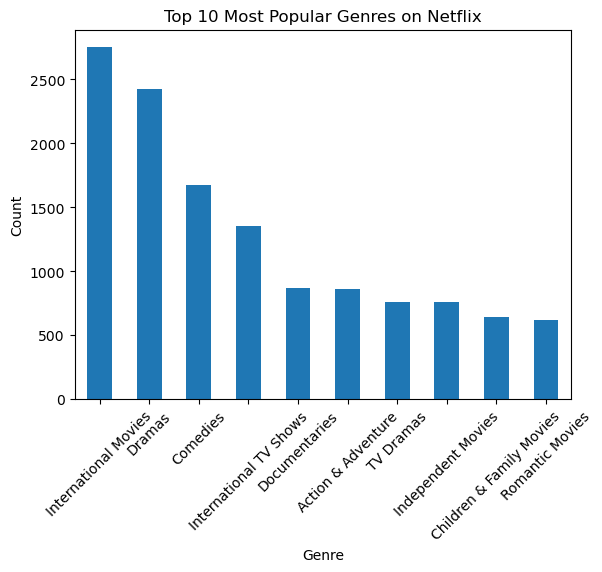

In [19]:
top_genres = genres.value_counts().head(10)

top_genres.plot(kind='bar')
plt.title("Top 10 Most Popular Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Interpretation of Genre Analysis

The bar chart highlights the most common genres available on Netflix.

**Key Insights:**
- **International Movies** appear most frequently, showing Netflix’s strong global content strategy.  
- **Dramas** and **Comedies** are also among the top genres, indicating audience preference for story-driven and entertainment-focused content.  
- A significant presence of **International TV Shows** reflects Netflix’s investment in regional and global storytelling.  

**Business Perspective:**
These insights suggest that Netflix prioritizes globally appealing and diverse content to attract audiences from different regions and cultural backgrounds.


## Country-wise Content Distribution

This analysis identifies which countries contribute the highest number of titles to the Netflix catalog, helping to understand global content production patterns.


In [21]:
# Split multiple countries into individual rows
countries = df['country'].dropna().str.split(', ').explode()

countries.value_counts().head(10)


country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

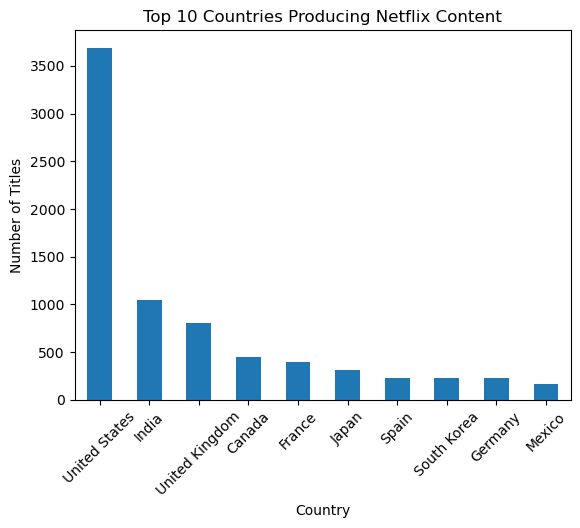

In [22]:
top_countries = countries.value_counts().head(10)

top_countries.plot(kind='bar')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


## Interpretation of Country-wise Content Analysis

The bar chart illustrates the top countries contributing content to Netflix.

**Key Insights:**
- The **United States** dominates Netflix’s catalog by a large margin, making it the biggest content contributor.  
- **India** and the **United Kingdom** are the next major contributors, reflecting Netflix’s strong expansion in Asian and European markets.  
- Countries like **Canada, France, Japan, South Korea, and Germany** also appear in the top contributors, highlighting the platform’s global reach.  

**Business Perspective:**
This distribution shows that Netflix follows a global content strategy — investing in both Hollywood and regional industries to attract diverse international audiences.


## Duration Analysis of Content

This section analyzes the duration of Movies and the number of seasons for TV Shows to understand content length patterns on Netflix.


In [24]:
# Separate movies and TV shows safely
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract minutes from duration for movies
movies.loc[:, 'minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# Extract seasons from duration for TV shows
tv_shows.loc[:, 'seasons'] = (
    tv_shows['duration']
    .str.replace(' Seasons', '', regex=False)
    .str.replace(' Season', '', regex=False)
    .astype(float)
)

movies['minutes'].describe(), tv_shows['seasons'].describe()



(count    6128.000000
 mean       99.577187
 std        28.290593
 min         3.000000
 25%        87.000000
 50%        98.000000
 75%       114.000000
 max       312.000000
 Name: minutes, dtype: float64,
 count    2676.000000
 mean        1.764948
 std         1.582752
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         2.000000
 max        17.000000
 Name: seasons, dtype: float64)

# Final Conclusion

This project performed Exploratory Data Analysis (EDA) on the Netflix Movies and TV Shows dataset to uncover meaningful insights about content trends and platform strategy.

### Key Findings:
- Netflix contains significantly more **Movies** than **TV Shows**, indicating a strong focus on movie content.
- The platform experienced rapid growth in content addition after **2015**, peaking around **2019–2020**.
- The most common genres are **International Movies, Dramas, and Comedies**, showing Netflix’s focus on globally appealing content.
- The **United States, India, and the United Kingdom** are the top contributors of Netflix content.
- Most movies are between **80–120 minutes**, and most TV shows have only **1–2 seasons**, suggesting a preference for easily consumable content.

### Overall Learning:
This project demonstrates practical skills in data cleaning, feature extraction, visualization, and converting data into business insights using Python. It reflects real-world data analysis workflow.
